In [1]:
# John Lee
# MSCS 633
# Hands On Assign 4: Use Unsupervised Deep Learning Algorithm to 
# Detect Fraud with PyOD

In [2]:
# This program implements deep learning techniques to build and train a Fraud Detection model
# using AutoEncoder and anonymized credit card transactions dataset

In [3]:
import pandas as pd
import numpy as np 
from pyod.models.auto_encoder import AutoEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, confusion_matrix


In [4]:
# Loads dataset
df = pd.read_csv('creditcard.csv')
# Displays first few top rows
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Drops Time and Class features for X to represent other features
# Dropping Time since it is a sequential feature not dependent on target variable
X = df.drop(['Time', 'Class'], axis=1)
# Represents target Class feature
y = df['Class']





In [6]:
# Reveals target distribution  
y.value_counts()


Class
0    284315
1       492
Name: count, dtype: int64

In [7]:
# Splits data between training and test sets, making 30% of data test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [8]:
# Standardizes X feature values in order for them to be on the same scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Builds and trains the AutoEncoder, where hidden_neuron_list is the number of neurons per hidden layers,
# epoch_num is the number of times the model views the entire dataset,
# contamination is the expected percentage of outliers

hn = [75, 32, 32, 75]
contamination = .02
epochs = 10

clf = AutoEncoder(
    hidden_neuron_list=hn,
    epoch_num=epochs,
    contamination=contamination,
    batch_size = 1000
)

# Trains the model
clf.fit(X_train_scaled)


Training: 100%|██████████| 10/10 [02:38<00:00, 15.90s/it]


In [10]:
# Evaluate the model and prediction labels, where 0 is the normal/inlier and 1 is fraud/outlier
y_test_pred = clf.predict(X_test_scaled)

In [11]:
# Filter outliers 
anomaly = np.where(y_test_pred==1)
anomaly

(array([   37,    66,    81, ..., 85189, 85284, 85291], shape=(1751,)),)

In [12]:
# Predict a test instance 
sample = X_test_scaled[[1519]]
clf.predict(sample, return_confidence=False)

array([1])

In [13]:
X_test_scaled[[1519]]

array([[ -9.99126585,   8.87074343, -15.00175206,   8.55094706,
        -10.73913857,   0.62883718, -22.43765067,  -9.94276242,
         -8.15814839, -17.3437156 ,   4.8705679 , -12.6789085 ,
         -1.0765178 ,  -7.69462694,  -3.27092907,  -9.79195736,
        -16.29745507,  -7.14590192,   1.74658584,   4.93885343,
        -11.11725113,   4.5690916 ,   4.13441479,   0.32237322,
         -2.29016045,   0.07953478, -10.12038919,  -1.95890684,
         -0.3402471 ]])

In [14]:
y_test.iloc[1519]

np.int64(1)

In [15]:
# Shows array containing ONLY the rows predicted as anomalies
predicted_anomalies = X_test_scaled[y_test_pred == 1]

# To see how many anomalies the model found
print(f"Total anomalies found: {len(predicted_anomalies)}")

# Prints first 5 rows of data for these anomalies
print(predicted_anomalies[:5])

Total anomalies found: 1751
[[-9.11240574e-01 -2.26520314e-02  7.16570954e-01 -1.28636431e+00
  -9.18480694e-01  1.10791966e+00 -1.62239086e-02 -3.44116360e-02
  -1.61468573e+00  1.98660950e+00  8.94916623e-01 -7.50596099e-01
   5.07080974e-01 -7.92237803e-01  2.20923818e+00 -2.38020679e+00
   2.21337695e+00 -2.56522551e+00 -1.14986073e+00 -9.80991919e-01
  -4.58514820e-01 -2.47578218e-03  3.43672465e-01 -1.11594487e+00
  -2.05687912e+00 -1.10374067e+00 -3.90239598e+00 -2.73401515e+00
   2.11863047e-01]
 [-4.20979574e+00  4.59458722e+00 -2.38917930e+00 -1.90148116e+00
  -5.89758152e-01 -1.25779756e+00  1.08935485e+00 -4.33402737e-01
   7.16256148e+00  1.13929334e+01  2.97976755e-01  2.08863689e-02
  -6.19971394e-02 -3.18820035e+00  1.27931976e+00 -1.90147309e+00
  -1.33679368e+00 -7.66960148e-01 -1.45462812e+00  6.79524391e+00
  -1.32812523e+00  9.57663870e-01  3.36167742e-01 -2.25849958e-01
   1.95213031e+00 -5.03179502e-01  7.55118178e+00  2.81126585e+00
  -3.45739749e-01]
 [-1.89009

In [16]:
# Show model's confidence if trained using perturbed data

clf.predict_confidence(sample)


array([1.])

In [17]:
# Generate binary labels of the training data. 0 means inliers and 1 means outliers
y_train_pred = clf.labels_

# Calculate outlier scores of the training data. Higher scores means higher severity of abnormalities
y_train_scores = clf.decision_scores_ 

In [18]:
y_train_pred[:5]

array([0, 0, 0, 0, 0])

In [19]:
# Find indices where the label is 1
train_anomaly_indices = np.where(y_train_pred == 1)[0]

print("Indices of training anomalies:")
print(train_anomaly_indices)

Indices of training anomalies:
[    18     22     55 ... 199026 199072 199236]


In [20]:
y_train_scores[:5]

array([1.9405679, 2.9523525, 4.294716 , 2.8959033, 2.8293674],
      dtype=float32)

In [21]:
import matplotlib.pyplot as plt

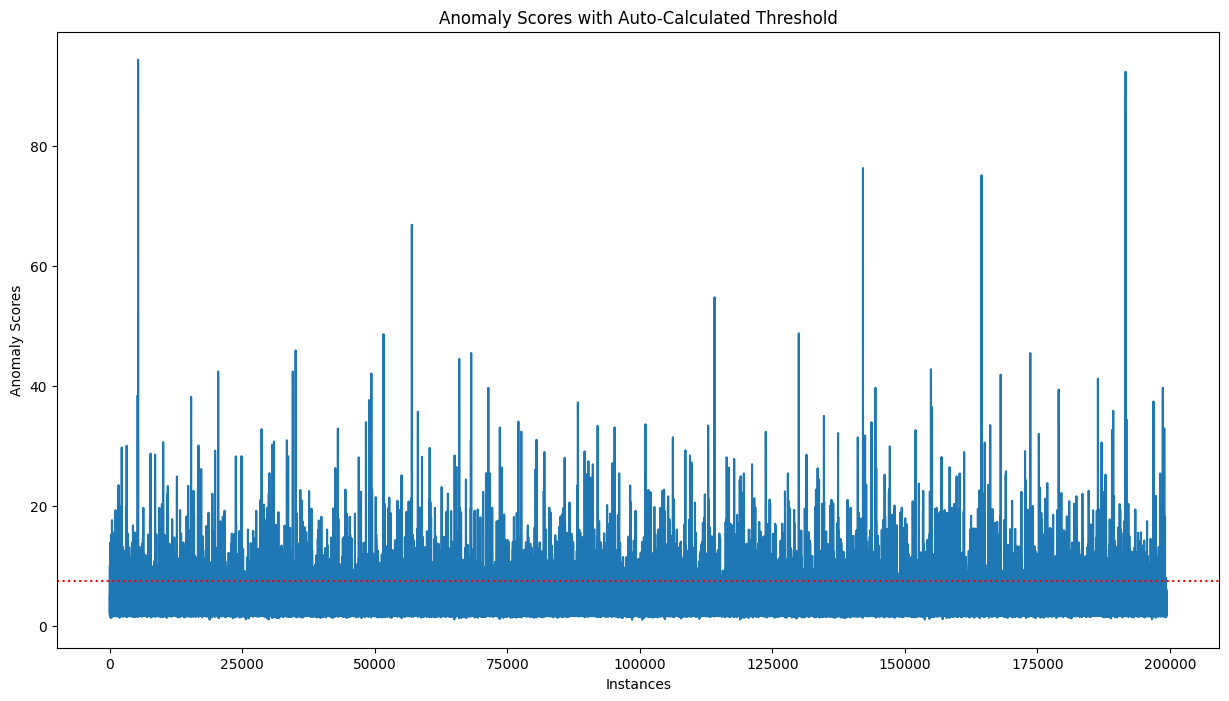

In [22]:
# Visualization of anomaly scores. Red horizontal line represents threshold

plt.rcParams["figure.figsize"] = (15,8)
plt.plot(y_train_scores);
plt.axhline(y=clf.threshold_, c='r', ls='dotted', label='threshold');
plt.xlabel('Instances')
plt.ylabel('Anomaly Scores')
plt.title('Anomaly Scores with Auto-Calculated Threshold');
plt.show()

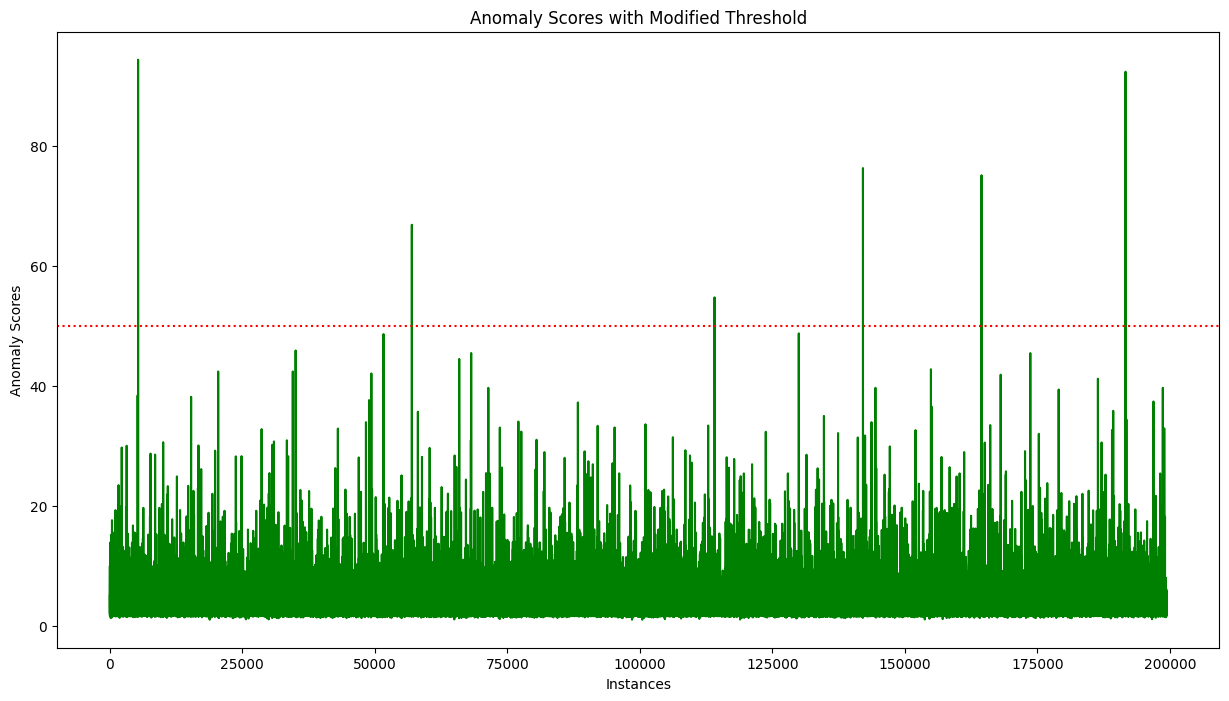

In [23]:
# Modify the threshold and view the new distribution. Red horizontal line represents the manually changed threshold

threshold = 50
plt.rcParams["figure.figsize"] = (15,8)
plt.plot(y_train_scores, color="green");
plt.axhline(y=threshold, c='r', ls='dotted', label='threshold');
plt.xlabel('Instances')
plt.ylabel('Anomaly Scores')
plt.title('Anomaly Scores with Modified Threshold');
plt.show()

In [24]:
import seaborn as sns

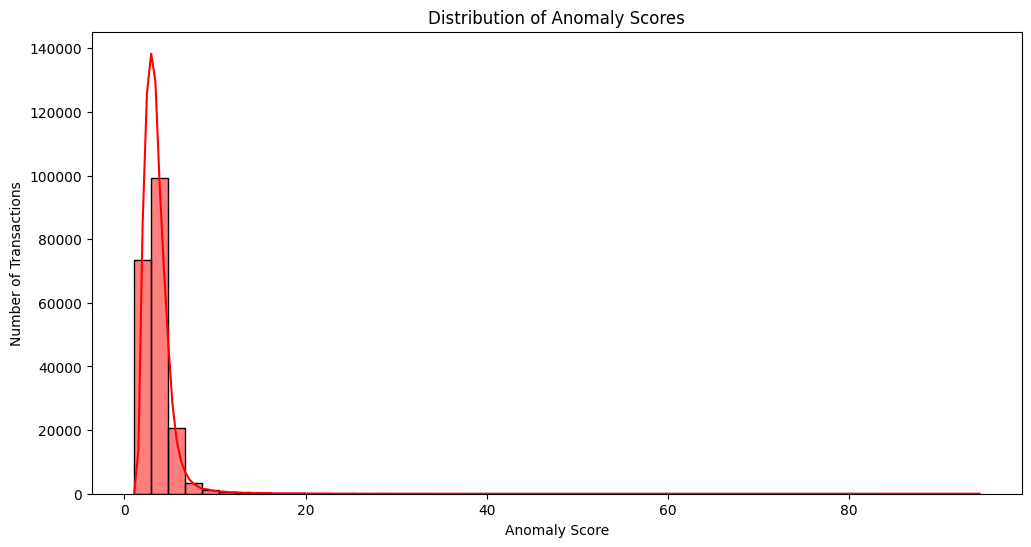

In [25]:
# Plot the distribution of anomaly scores
plt.figure(figsize=(12,6))
sns.histplot(y_train_scores, bins=50, kde=True, color='red')  

plt.title("Distribution of Anomaly Scores")
plt.xlabel("Anomaly Score")
plt.ylabel("Number of Transactions")
plt.show()



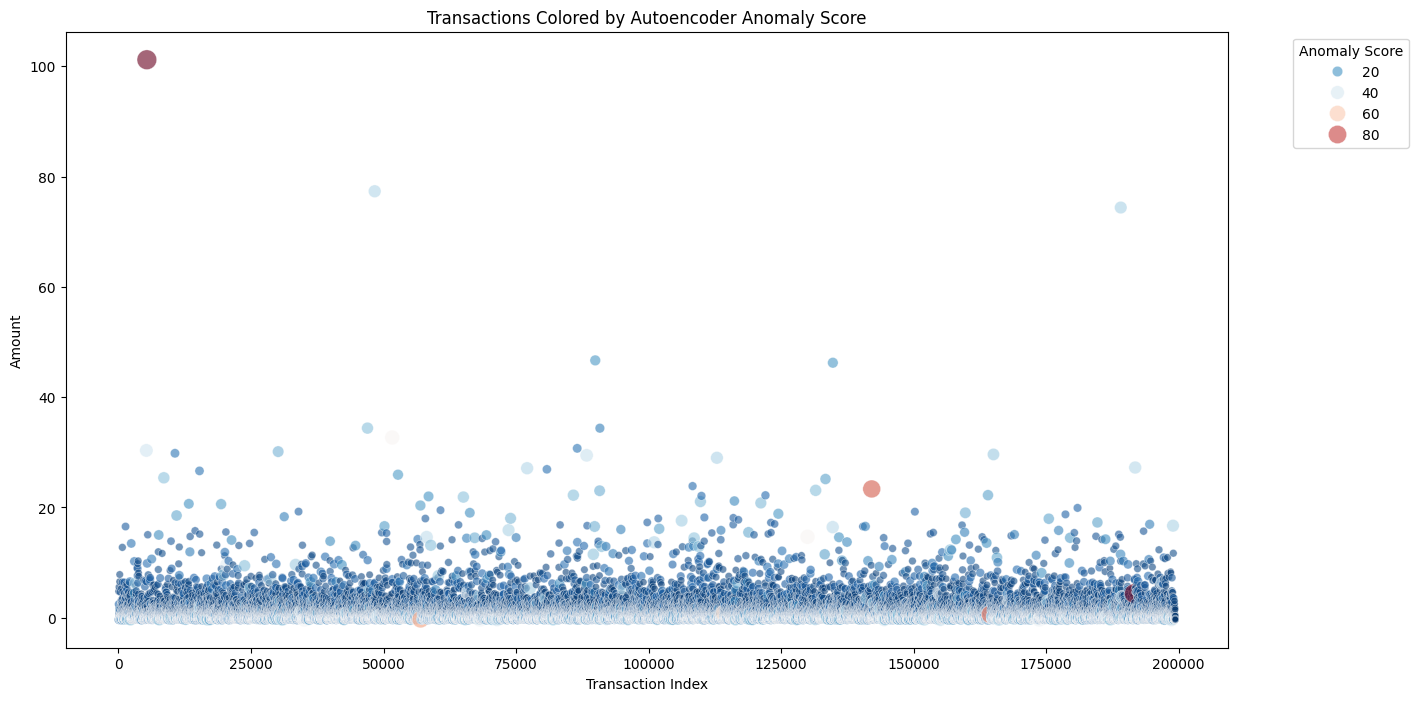

In [26]:
# Visualize a scatter plot

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    "Index": range(len(y_train_scores)),  
    "Amount": X_train_scaled[:, 28],             
    "AnomalyScore": y_train_scores
})

# Scatter plot colored and sized by anomaly score
sns.scatterplot(
    data=plot_df,
    x="Index",
    y="Amount",
    hue="AnomalyScore",
    palette="RdBu_r",
    size="AnomalyScore",
    sizes=(20, 200),
    alpha=0.6
)

plt.xlabel("Transaction Index")
plt.ylabel("Amount")
plt.title("Transactions Colored by Autoencoder Anomaly Score")
plt.legend(title="Anomaly Score", bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

In [27]:
# decision_function calculates the 'Anomaly Score' ( Error)
# Higher scores indicate a higher probability of being a fraudulent transaction
y_test_scores = clf.decision_function(X_test_scaled)

In [28]:
# Generate the Confusion Matrix:
# Row 0: Actual Legitimate transactions
# Row 1: Actual Fraudulent transactions
# Column 0: Predicted Legitimate
# Column 1: Predicted Fraudulent
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))

Confusion Matrix


[[83626  1669]
 [   66    82]]


In [29]:
# Since we are dealing with highly unbalanced dataset, computing precision and recall are appropriate metric evaluations over accuracy

# Precision is where out of all times model predicts fraud, what percentage did it correctly predict it 
precision = precision_score(y_test, y_test_pred)
# Recall is what percentage of fraud did it actually spot 
recall = recall_score(y_test, y_test_pred)

print(f"Precision for Fraud: {precision:.4f}")
print(f"Recall for Fraud: {recall:.4f}")

Precision for Fraud: 0.0468
Recall for Fraud: 0.5541
